**Import csv**

In [48]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

spark = SparkSession.builder.appName('imbalanced_binary_classification').getOrCreate()
df = spark.read.csv('C:\\Users\\Sampayo\\Documents\\Data Science\\Proyectos\\Spark\\application_train.csv', header = True, inferSchema = True)
df.printSchema()  #printSchema() only shows us the column names and its data type

root
 |-- SK_ID_CURR: integer (nullable = true)
 |-- TARGET: integer (nullable = true)
 |-- NAME_CONTRACT_TYPE: string (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- AMT_CREDIT: double (nullable = true)
 |-- AMT_ANNUITY: double (nullable = true)
 |-- AMT_GOODS_PRICE: double (nullable = true)
 |-- NAME_TYPE_SUITE: string (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- REGION_POPULATION_RELATIVE: double (nullable = true)
 |-- DAYS_BIRTH: integer (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- DAYS_REGISTRATION: double (nullable = true)
 |-- DAYS_ID_PUBLISH: integer (nullable = true)
 |-- OWN_CAR_AG

### EDA

**Spark to pandas DataFrame**

In [49]:
df.toPandas()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**Pandas describe()**

In [57]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']
df.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
label,307511,0.08072881945686496,0.272418645648393,0,1
CNT_CHILDREN,307511,0.4170517477423572,0.7221213844376257,0,19
DAYS_BIRTH,307511,-16036.995066843137,4363.988631785567,-25229,-7489
DAYS_EMPLOYED,307511,63815.04590404896,141275.76651872718,-17912,365243
DAYS_ID_PUBLISH,307511,-2994.2023732484367,1509.4504190030234,-7197,0
FLAG_MOBIL,307511,0.9999967480838083,0.0018033070153514825,0,1
FLAG_EMP_PHONE,307511,0.8198893698111612,0.3842801989387647,0,1
FLAG_WORK_PHONE,307511,0.1993684778755882,0.399526228150226,0,1
FLAG_CONT_MOBILE,307511,0.9981334001060125,0.0431638941424324,0,1


**value_counts**

In [ ]:
df.groupBy('state').count().show()

**Class balance**

In [54]:
df.groupby('label').count().toPandas()

,label,count
0,1,24825
1,0,282686


307511


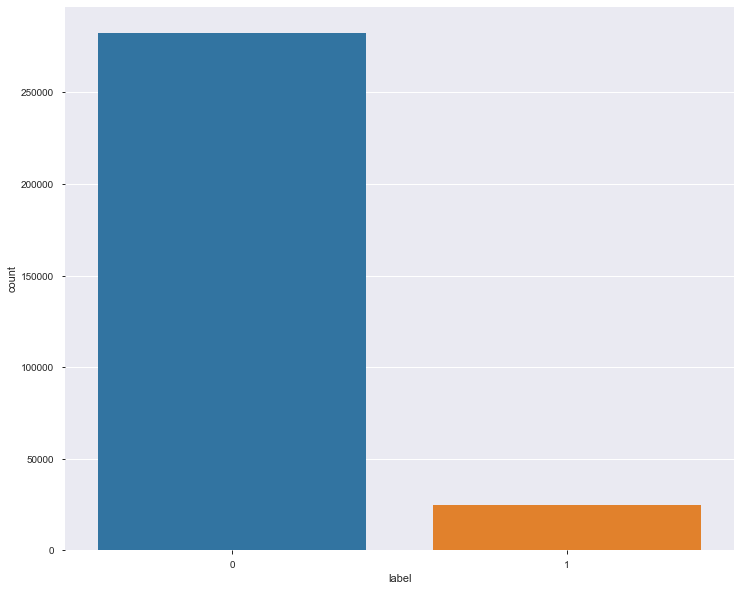

In [55]:
%matplotlib inline
df_pd = df.toPandas()

print(len(df_pd))

plt.figure(figsize=(12,10))
sns.countplot(x='label', data=df_pd, order=df_pd['label'].value_counts().index)

**Groupby**

In [ ]:
df.groupby('column').count().toPandas()

**Unique values of a column**

In [ ]:
df.select('X').distinct().rdd.map(lambda r: r[0]).collect()

**Filter the rows which contains 'x' value in the column**

In [ ]:
df.filter(df['column']=='value').show()

### Data Wrangling

**Drop,rename, select columns**

In [53]:
drop_col = ['SK_ID_CURR']

df = df.select([column for column in df.columns if column not in drop_col])
df = df.withColumnRenamed('TARGET', 'label')

df = df.select('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit')
cols = df.columns

**Split features in categorical and numerical**

In [58]:
df_num = df.select([t[0] for t in df.dtypes if (t[1] == 'int') or (t[1] == 'double')])
df_cat = df.select([t[0] for t in df.dtypes if t[1] == 'string'])

16  categorical features
104  numerical features


**Missings**

In [62]:
from pyspark.sql import functions as F

df_null = df.select(*(F.sum(F.col(c).isNull().cast("Double")).alias(c) for c in df.columns)).toPandas()
df_null

,label,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,278.0,...,0.0,0.0,0.0,0.0,41519.0,41519.0,41519.0,41519.0,41519.0,41519.0


**Fill null values with the mean of respective column**

In [84]:
numeric_cols = df_num.columns

#Find the avg of all numeric columns
from pyspark.sql.functions import avg

def mean_of_pyspark_columns(df, numeric_cols, verbose=False):
    col_with_mean=[]
    for col in numeric_cols:
        mean_value = df.select(avg(df[col]))
        avg_col = mean_value.columns[0]
        res = mean_value.rdd.map(lambda row : row[avg_col]).collect()
        
        if (verbose==True): print(mean_value.columns[0], "\t", res[0])
        col_with_mean.append([col, res[0]])    
    return col_with_mean

mean_of_pyspark_columns(df, numeric_cols, verbose=False)

#Fill missing values for mean
from pyspark.sql.functions import when, lit

def fill_missing_with_mean(df, numeric_cols):
    col_with_mean = mean_of_pyspark_columns(df, numeric_cols) 
    
    for col, mean in col_with_mean:
        df = df.withColumn(col, when(df[col].isNull()==True, 
        lit(mean)).otherwise(df[col]))
        
    return df

SyntaxError: invalid syntax (<ipython-input-84-3fae2dc4d3f8>, line 17)

In [ ]:
df_num = fill_missing_with_mean(df_num, numeric_cols)
df_num.show()

**Balance classes**

In [ ]:
# adding the new column weights and fill it with ratios
from pyspark.sql.functions import when
ratio = 0.91
def weight_balance(labels):
    return when(labels == 1, ratio).otherwise(1*(1-ratio))
new_df = new_df.withColumn('weights', weight_balance(col('label')))

**Correlations between independent variables**